<a href="https://colab.research.google.com/github/hariehkr/techGig/blob/main/TechGig_MLModels_SemiFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [2]:
import pandas as pd # Pandas for data manipulations
import numpy as np  # Numpy for the computations
import os
from sklearn.metrics import accuracy_score,classification_report # For metrics
from sklearn.model_selection import train_test_split             # For train and test splits
from sklearn.model_selection import GridSearchCV                 # For GridSearch and K-fold cross validation
from sklearn.impute import SimpleImputer                         # For Imputation

import matplotlib.pyplot as plt # For visualizations
import seaborn as sns           # For visualizations

import warnings                   # For warnings
warnings.filterwarnings('ignore') # Supress/Ignore warnings

### Function for training the model

In [3]:
# Function for training the model
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score

def fn_train_model(model, 
                X_train, 
                y_train, 
                parameters = None, 
                k = 1):
    if parameters == None:
        model.fit(X_train, y_train) 
    else:
        model_cv = GridSearchCV(model, 
                                param_grid = parameters, 
                                cv = k)
        
        model_cv.fit(X_train, y_train)
        model = model_cv.best_estimator_
        
    return model

### # Function to generate classification metrics

In [15]:
# Function to generate classification metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

def fn_compute_metrics(model,
                       model_name,
                       train_data, 
                       train_actuals,
                       test_data,
                       test_actuals):
    metrics = {}
    # train metrics
    train_predictions = model.predict(train_data)
    metrics['train_accuracy']    = accuracy_score(train_actuals, train_predictions)
    metrics['train_precision']   = precision_score(train_actuals, train_predictions)
    metrics['train_recall']      = recall_score(train_actuals, train_predictions)
    metrics['train_f1_score']    = f1_score(train_actuals, train_predictions)
    # test metrics
    test_predictions  = model.predict(test_data)
    metrics['validation_accuracy']     = accuracy_score(test_actuals, test_predictions)
    metrics['validation_precision']    = precision_score(test_actuals, test_predictions)
    metrics['validation_recall']       = recall_score(test_actuals, test_predictions)
    metrics['validation_f1_score']     = f1_score(test_actuals, test_predictions)
    
    return pd.Series(metrics, name = model_name)

In [16]:
# Function to generate classification metrics
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def fn_compute_metrics_train(model, 
                       data, 
                       actuals):
    
    predictions = model.predict(data)
    print('\nConfusion Matrix :')
    print(confusion_matrix(actuals, predictions) ) 
    
    print('\nReport : ')
    print(classification_report(actuals, predictions))
    
    fe_recall = recall_score(actuals, predictions, average = None)[0]
    print('Recall score :', fe_recall)
    
    return fe_recall

### Train/Validation data reading

In [6]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hariehkr/techGig/main/data/Phising_Training_Dataset.csv')
df_train.index=df_train['key']
df_train.drop('key', inplace=True, axis=1)
print(df_train.shape)
df_train.head()

(8955, 31)


,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
key,,,,,,,,,,,,,,,,,,,,,
12344,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
12345,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
12346,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
12347,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
12348,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


### Divide data into training and validation subsets

In [7]:
# Divide data into training and validation subsets
y = df_train['Result']
X = df_train.drop(['Result'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size=0.8, 
                                                    test_size=0.2,
                                                    random_state=0)

## Convert tart variable into categorical 

In [8]:
y_train = y_train.astype('category')
y_test = y_test.astype('category')

In [9]:
print('X_train dimensions: ', X_train.shape)
print('y_train dimensions: ', y_train.shape)
print('X_test dimensions:  ', X_test.shape)
print('y_test dimensions:  ', y_test.shape)

X_train dimensions:  (7164, 30)
y_train dimensions:  (7164,)
X_test dimensions:   (1791, 30)
y_test dimensions:   (1791,)


 1    5034
-1    3921
Name: Result, dtype: int64

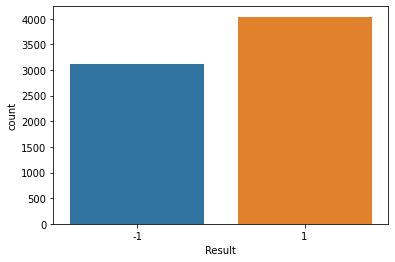

In [10]:
plot_data = y_train.to_frame()
sns.countplot(x = 'Result', data=plot_data)
df_train.Result.value_counts()

# LogisticRegression

In [48]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression(penalty='l2',
                         class_weight="balanced",
                         random_state=1,
                         n_jobs=-1)

final_lrc_model = fn_train_model(lrc,
                          X_train,
                          y_train)


final_lrc_model_metrics = fn_compute_metrics(final_lrc_model,
                                      'Final_lrc_model',
                                       X_train,
                                       y_train,
                                       X_test,
                                       y_test)

print(final_lrc_model)
print(final_lrc_model_metrics)

LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=1)
train_accuracy          0.928811
train_precision         0.937098
train_recall            0.936634
train_f1_score          0.936866
validation_accuracy     0.921831
validation_precision    0.928715
validation_recall       0.930584
validation_f1_score     0.929648
Name: Final_lrc_model, dtype: float64


# RandomForestClassifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs = -1,
                             random_state = 1)


In [50]:
base_model = fn_train_model(rfc, 
                            X_train,
                            y_train)

In [51]:
base_model_metrics = fn_compute_metrics(base_model,
                                        'base_model',
                                        X_train,
                                        y_train,
                                        X_test,
                                        y_test)
print(base_model_metrics)

train_accuracy          0.989671
train_precision         0.988664
train_recall            0.993069
train_f1_score          0.990862
validation_accuracy     0.970408
validation_precision    0.964462
validation_recall       0.982897
validation_f1_score     0.973592
Name: base_model, dtype: float64


In [52]:
parameters = {
    "n_estimators" : [150],
    "min_samples_leaf" : [3],
    "max_features": [0.5],
    "class_weight" : ['balanced_subsample']}

final_rfc_model = fn_train_model(rfc,
                          X_train,
                          y_train,
                          parameters, k = 10)


final_rfc_model_metrics = fn_compute_metrics(final_rfc_model,
                                      'Final_rfc_model',
                                       X_train,
                                       y_train,
                                       X_test,
                                       y_test)

print(final_rfc_model)
print(final_rfc_model_metrics)

RandomForestClassifier(class_weight='balanced_subsample', max_features=0.5,
                       min_samples_leaf=3, n_estimators=150, n_jobs=-1,
                       random_state=1)
train_accuracy          0.974456
train_precision         0.980563
train_recall            0.974010
train_f1_score          0.977276
validation_accuracy     0.951982
validation_precision    0.957661
validation_recall       0.955734
validation_f1_score     0.956697
Name: Final_rfc_model, dtype: float64


In [31]:
final_rfc_model.feature_importances_

array([0.00700603, 0.00651789, 0.00256098, 0.00147656, 0.00150823,
       0.03077751, 0.04334826, 0.4622681 , 0.00854268, 0.00206096,
       0.00054235, 0.00232858, 0.01038621, 0.24352271, 0.03526651,
       0.01195586, 0.00372484, 0.00149946, 0.00214779, 0.00132842,
       0.00070669, 0.00218666, 0.00106242, 0.01029141, 0.00740744,
       0.07140135, 0.00554062, 0.00598521, 0.01486912, 0.00177913])

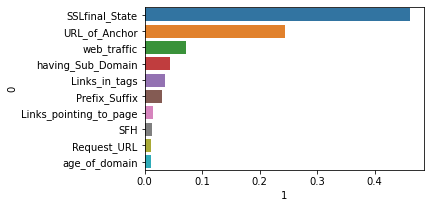

In [32]:
feature_names = list(X_train.columns)
plt.figure(figsize=(5,3))
d = pd.DataFrame([feature_names,final_rfc_model.feature_importances_]).T
d = d.sort_values([1],ascending=False)[0:10]
sns.barplot(d[1],d[0])


# DecisionTreeClassifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

final_dtc_model = fn_train_model(dtc,
                          X_train,
                          y_train)


final_dtc_model_metrics = fn_compute_metrics(final_dtc_model,
                                      'Final_dtc_model',
                                       X_train,
                                       y_train,
                                       X_test,
                                       y_test)

print(final_dtc_model)
print(final_dtc_model_metrics)

DecisionTreeClassifier()
train_accuracy          0.989671
train_precision         0.991815
train_recall            0.989851
train_f1_score          0.990833
validation_accuracy     0.958124
validation_precision    0.962739
validation_recall       0.961771
validation_f1_score     0.962255
Name: Final_dtc_model, dtype: float64


# Gradient Boosting Machines model.

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=10,
                                 learning_rate=1,
                                 max_depth = 2,
                                 warm_start = True,
                                 random_state=2345)

In [41]:
final_model = fn_train_model(gbm, X_train, y_train,)

In [42]:
fn_compute_metrics_train(gbm, X_train, y_train,)


Confusion Matrix :
[[2861  263]
 [ 185 3855]]

Report : 
              precision    recall  f1-score   support

          -1       0.94      0.92      0.93      3124
           1       0.94      0.95      0.95      4040

    accuracy                           0.94      7164
   macro avg       0.94      0.94      0.94      7164
weighted avg       0.94      0.94      0.94      7164

Recall score : 0.9158130601792573


0.9158130601792573

In [53]:
final_GBM_model_metrics = fn_compute_metrics(final_model,
                                      'final_model',
                                       X_train,
                                       y_train,
                                       X_test,
                                       y_test)

print(final_model)
print(final_GBM_model_metrics)

XGBClassifier(n_estimators=15, random_state=2)
train_accuracy          0.915690
train_precision         0.922528
train_recall            0.928465
train_f1_score          0.925487
validation_accuracy     0.913456
validation_precision    0.921608
validation_recall       0.922535
validation_f1_score     0.922071
Name: final_model, dtype: float64


# Final Model Building

 	Model:  	     train| validation_accuracy     
LogisticRegression :  0.928	|		    0.921 <br>
RandomForestClassifier: 0.989|			0.970 <br>
DecisionTreeClassifier:  0.989|			0.958 <br>
Gradient Boosting     :  0.915 |			0.913 <br>

### RandomForest Choosen for the prediction

In [57]:
X_train_all = pd.concat([X_train, X_test])
y_train_all = pd.concat([y_train, y_test])

print(X_train_all.shape, y_train_all.shape)

(8955, 30) (8955,)


In [66]:
df_test = pd.read_csv('https://raw.githubusercontent.com/hariehkr/techGig/main/data/Phising_Testing_Dataset.csv')
df_test.index=df_test['key']
df_test.drop('key', inplace=True, axis=1)
print(df_test.shape)
df_test.head(2)

(2100, 30)


,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
key,,,,,,,,,,,,,,,,,,,,,
21338,1,1,1,1,1,1,-1,1,-1,1,...,1,1,1,1,1,1,1,-1,0,1
21339,1,-1,1,1,1,-1,0,-1,1,1,...,1,1,1,-1,-1,0,-1,-1,0,1


In [58]:
base_model = fn_train_model(rfc, 
                            X_train_all,
                            y_train_all)

In [ ]:
parameters = {
    "n_estimators" : [150],
    "min_samples_leaf" : [3],
    "max_features": [0.5],
    "class_weight" : ['balanced_subsample']}

final_rfc_model = fn_train_model(base_model,
                           X_train_all,
                           y_train_all,
                          parameters, k = 10)

In [ ]:
fn_compute_metrics_train(final_rfc_model, X_train_all, y_train_all,)

## Final Test Predicton

In [68]:
test_pred = final_rfc_model.predict(df_test)

In [69]:
test_pred[0:10]

array([ 1, -1, -1, -1,  1,  1,  1,  1,  1, -1])

## Submit Test Predicton results

In [ ]:
submissions_df = pd.DataFrame({'key': df_test.key, 'Result': test_pred})
submissions_df.head()

In [ ]:
submissions_df.to_csv(folder+u'//'+ "test_predictions_Submission.csv", index=None)